In [ ]:
#@title Load your dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Physics/SunSpot/sunspot_data.csv"
sunspot_data = pd.read_csv('sunspot_data.csv')

sunspot_data.csv.1  100%[===================>]   2.77M  5.71MB/s    in 0.5s    


In [ ]:
sunspot_data.tail()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
73713,73713,2019,10,27,2019.821,0,0.0,34,0
73714,73714,2019,10,28,2019.823,0,0.0,34,0
73715,73715,2019,10,29,2019.826,0,0.0,30,0
73716,73716,2019,10,30,2019.829,0,0.0,24,0
73717,73717,2019,10,31,2019.832,0,0.0,28,0


In [ ]:
sunspot_data.describe()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,36858.500000,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,21280.697909,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,0.000000,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,18429.250000,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,36858.500000,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,55287.750000,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,73717.000000,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


In [ ]:
np.sum(sunspot_data.isna())


Unnamed: 0                  0
Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

(array([5.9632e+04, 1.6920e+03, 4.5370e+03, 5.2310e+03, 1.6500e+03,
        3.5100e+02, 2.6900e+02, 2.2000e+02, 1.0600e+02, 3.0000e+01]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

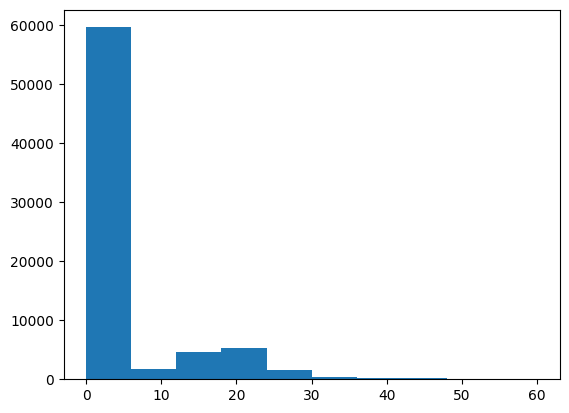

In [ ]:
plt.hist(sunspot_data['Observations'])

In [ ]:
np.sum(sunspot_data['Observations'] == 0)

3247

In [ ]:
sunspot_data.shape

(73718, 9)

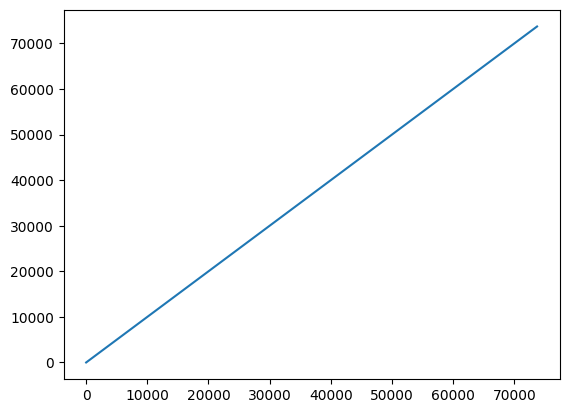

In [ ]:
plt.plot(sunspot_data['Unnamed: 0'])

(0.0, 5.0)

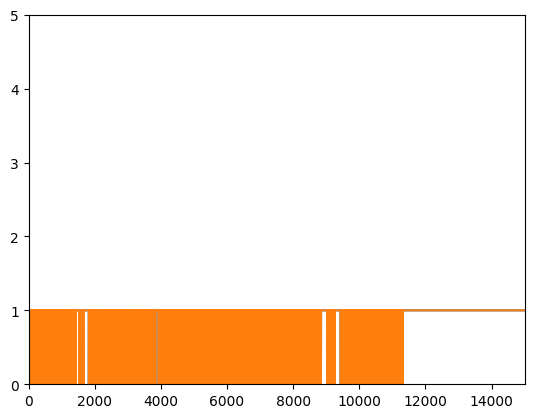

In [ ]:
plt.plot(sunspot_data['Observations'])
plt.xlim(58000)
#plt.ylim(0, 5)
plt.plot(sunspot_data['Observations'])
plt.xlim(0, 15000)
plt.ylim(0, 5)

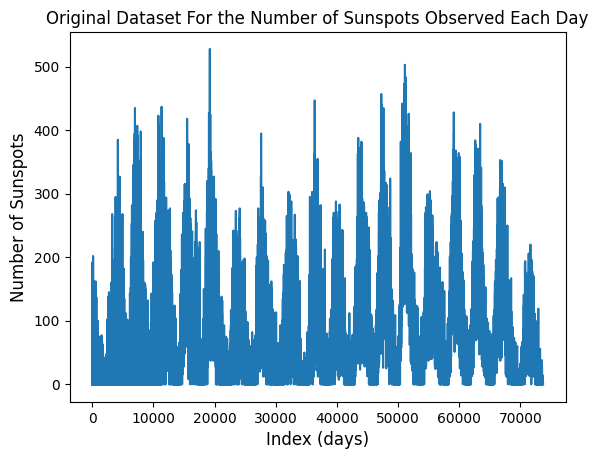

In [ ]:
plt.plot(sunspot_data['Number of Sunspots'])
plt.xlabel('Index (days)', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of Sunspots', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.title("Original Dataset For the Number of Sunspots Observed Each Day")
plt.show()

# Dropping Bad Rows

Drop all rows before #11313 (last day with 0 observations)
roughly at 1850

In [ ]:
noObsInd = sunspot_data['Observations'] == 0
sunspot_data[noObsInd].describe()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.0,3247.0,3247.0,3247.0
mean,5961.582076,1833.818294,6.569757,16.131506,1834.323690,-1.0,-1.0,0.0,1.0
std,3249.684204,8.882522,3.926620,8.781121,8.897136,0.0,0.0,0.0,0.0
min,0.000000,1818.000000,1.000000,1.000000,1818.001000,-1.0,-1.0,0.0,1.0
25%,3273.500000,1826.000000,3.000000,8.000000,1826.964500,-1.0,-1.0,0.0,1.0
50%,6558.000000,1835.000000,7.000000,17.000000,1835.958000,-1.0,-1.0,0.0,1.0
75%,8146.000000,1840.000000,10.000000,24.000000,1840.304500,-1.0,-1.0,0.0,1.0
max,11313.000000,1848.000000,12.000000,31.000000,1848.974000,-1.0,-1.0,0.0,1.0


In [ ]:
indexOfLastRowWithObs0 = np.where(noObsInd)[0][-1]
sunspot_data = sunspot_data.truncate(before=indexOfLastRowWithObs0+1)

In [ ]:
from sklearn.decomposition import PCA

# (1) Initialize PCA object with 2 components
pca = PCA(n_components=2)

# (2) Learn Principal Components

principal_components = pca.fit_transform(sunspot_data.drop('Number of Sunspots', axis=1))

# (3) Create Dataframe to hold spectograms and respective resistant antibiotics
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
principal_df

,PC1,PC2
0,-31201.736070,7.264312
1,-31200.735768,8.272113
2,-31199.735871,9.269496
3,-31198.736070,10.264274
4,-31197.735855,11.269843
...,...,...
62399,31197.740938,11.256423
62400,31198.740937,12.256410
62401,31199.739683,13.264010
62402,31200.737802,14.275416


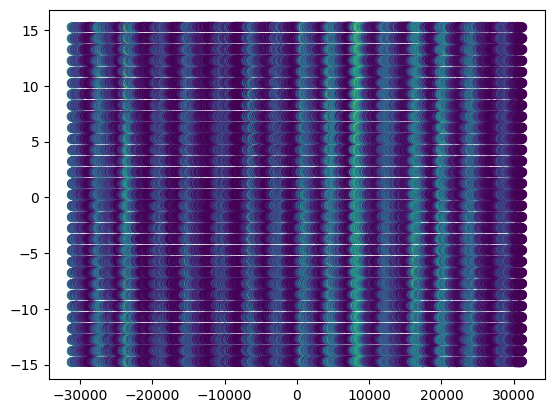

In [ ]:
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=sunspot_data['Number of Sunspots'])

In [ ]:
sunspot_data = sunspot_data.drop(["Month", "Year", "Day", "Indicator", "Standard Deviation", "Unnamed: 0", "Observations"], axis=1)
#sunspot_data.drop("Year", axis=1)

In [ ]:
sunspot_data.reset_index(inplace=True)
sunspot_data.head()


,index,Date In Fraction Of Year,Number of Sunspots
0,11314,1848.977,353
1,11315,1848.980,240
2,11316,1848.982,275
3,11317,1848.985,352
4,11318,1848.988,268


**Goal**: to be able to divide the data into x+1 day segments and specify x when testing, since the most important features to predict the number of sunspots is the previous numbers of sunspots from days/weeks/months before.

input(x): time series (data ordered by time)

label:(y): the next day's number of sunspots (the day immediately following the input date)



asd;fljk

# --

In [ ]:
sunspot_data.columns

Index(['index', 'Date In Fraction Of Year', 'Number of Sunspots'], dtype='object')

In [ ]:
start=0
y=0

monthly_mean = sunspot_data.groupby(np.arange(len(sunspot_data))//30).mean()
monthly_mean.head()
y_temp = monthly_mean['Number of Sunspots']
X = monthly_mean.drop(columns='Number of Sunspots')
from sklearn.model_selection import train_test_split
# print("X_train dimension: ", X_train.shape)
# print("X_test dimension: ", X_test.shape)
# print("y_train dimension: ", y_train.shape)
# print("y_test dimension: ", y_test.shape)

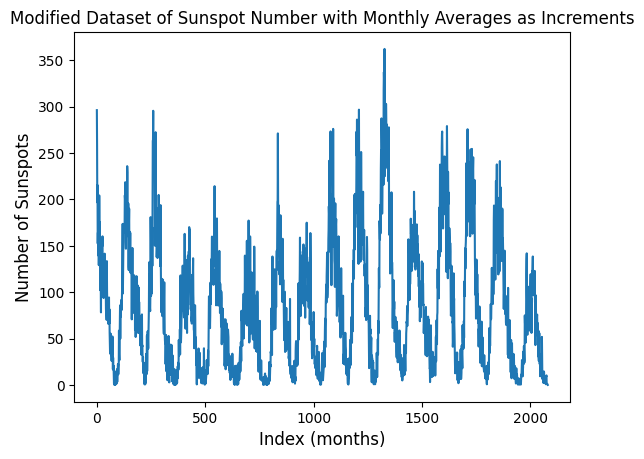

In [ ]:
plt.plot(y_temp)
plt.xlabel('Index (months)', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of Sunspots', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.title("Modified Dataset of Sunspot Number with Monthly Averages as Increments")
plt.show()

# ----

In [ ]:
sunspot_data.shape

(62404, 3)

In [ ]:
def reshape_overlapping(x, step=1):
     M = x[0:step]
     for i in range(1, len(x)-step):
         M = np.vstack([M, x[i:i+step]])
     M = pd.DataFrame(M)
     return M

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from numpy import sqrt
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    step = i
    exp_variance = round(explained_variance,4)
    MSLE = round(mean_squared_log_error,4)
    r2 = round(r2,4)
    MAE = round(mean_absolute_error,4)
    MSE = round(mse,4)
    RMSE = round(np.sqrt(mse),4)
    return[step, exp_variance, MSLE, r2, MAE, MSE, RMSE]

**RandomForest**


In [ ]:
import time
results_list = []
start = None
end = None
time_to_run = []
for i in range(1,200):
  #print("Results of step = ", i)
  total_days = len(monthly_mean)

  start = time.time()
  X = reshape_overlapping(y_temp, step=i)
  end = time.time()
  time_to_run.append(end-start)
  y = y_temp.iloc[i:] #x few days unusable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)


  # STEP 1: Initialization
  random_forest_model = RandomForestRegressor(max_depth=5, random_state=1, max_features=8)

  # STEP 2: Training
  random_forest_model.fit(X_train, y_train)

  # STEP 3: Prediction
  predictions = random_forest_model.predict(X_test)

  # STEP 4: Evaluation
  results_list.append(regression_results(y_test, predictions))

In [ ]:
df = pd.DataFrame (results_list, columns = ['step', 'exp_variance', 'MSLE', 'r2', 'MAE', 'MSE', 'RMSE'])
df['time_to_run'] = time_to_run

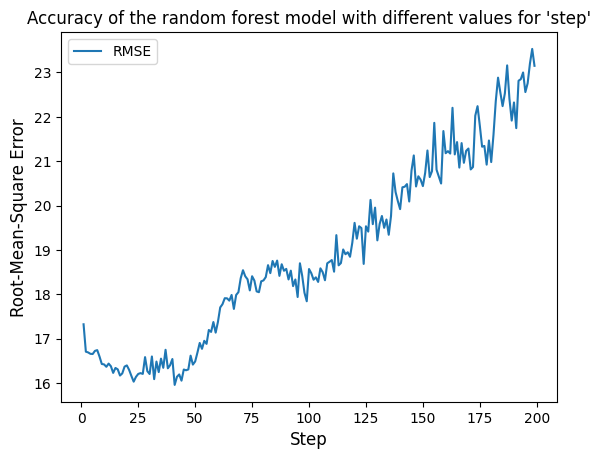

In [ ]:
df.plot(x='step', y='RMSE')
plt.xlabel('Step', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Root-Mean-Square Error', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.title("Accuracy of the random forest model with different values for 'step'")
plt.show()

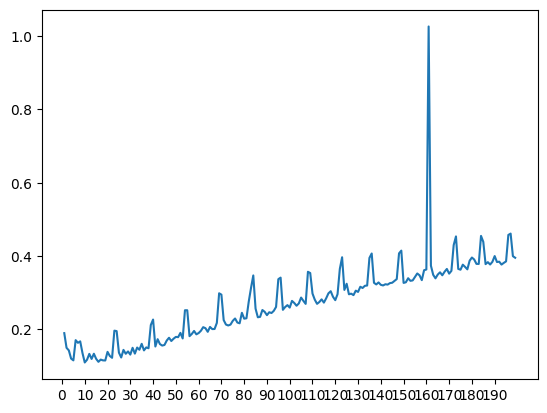

In [ ]:
plt.plot(df['step'], df['time_to_run'])
plt.xticks(np.arange(0, 200, 10))
plt.show()

time how long it takes for the loop to run

In [ ]:
df.describe()

,step,exp_variance,MSLE,r2,MAE,MSE,RMSE,time_to_run
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,0.815172,0.840699,0.758244,15.070125,361.407573,18.897551,0.271394
std,57.590508,0.027592,0.248654,0.059171,2.066579,80.094030,2.076493,0.106983
min,1.000000,0.740200,0.415500,0.624900,12.164200,254.574400,15.955400,0.109329
25%,50.500000,0.795300,0.622350,0.706850,12.874950,280.845400,16.758450,0.188286
50%,100.000000,0.824100,0.860700,0.767600,14.848600,344.795400,18.568700,0.274330
75%,149.500000,0.837100,1.064850,0.817650,16.888300,426.685400,20.656400,0.347075
max,199.000000,0.854100,1.243100,0.836200,19.148300,553.737100,23.531600,1.026354


In [ ]:
df.to_excel("./test.xlsx", index=False)

In [ ]:
from google.colab import files
#files.download("test.xlsx")

**Plotting**

real vs predicted, 
"STEP" CHANGABLE IN "RANDOM FOREST" SECTION. Original value = 200

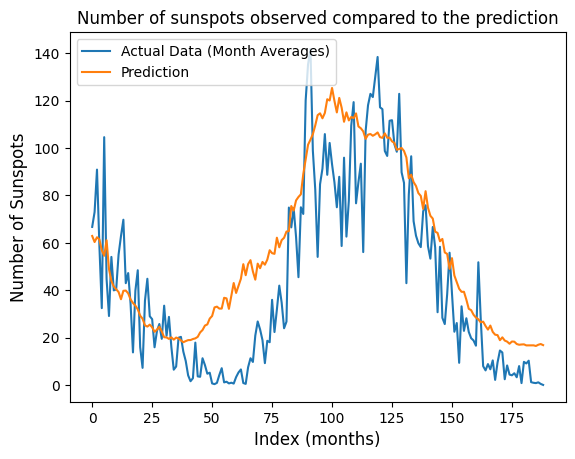

In [ ]:
y_test_graph = y_test.reset_index(drop = True, inplace = False)
plt.plot(y_test_graph, label='Actual Data (Month Averages)')
plt.plot(predictions, label='Prediction')
plt.legend()
plt.xlabel('Index (months)', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.ylabel('Number of Sunspots', fontweight='normal', color = 'black', fontsize='12', horizontalalignment='center')
plt.title("Number of sunspots observed compared to the prediction")
plt.show()
#1. make them stack together by specifying the prediction is for 1900-2000
#2. be able to record predictions for all step #s
#3. identify the 3 best lines, only graph them w/ each of their variances